# Using sklearn!

Fortunately we do not need to code each ML algorithm! *scikit-learn* contains many optimized implementations for various algorithms!


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def create_data(n_samples=10, noise=0.1):
    x_true = np.linspace(0, 1, 100)
    y_true = np.sin(2*np.pi*x_true)

    x = np.linspace(0, 1, n_samples)
    y = np.sin(2*np.pi*x) + np.random.randn(*x.shape) * noise
    return (x_true, y_true), (x, y)

Import sklearn!

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
def fit_plot_linear(N = 10, l=0):
    
    (x_true, y_true), (x, y) = create_data(N)
    # Add an extra axis to be compliant with sk-learn
    x = x[:, np.newaxis]
    
    # We just need these two lines!
    model = LinearRegression()
    model.fit(x, y)
    
    # Get the predictions
    y_pred = model.predict(x)
    
    # Get the decision function
    x_des = np.linspace(0, 1, 100)
    x_des = x_des[:, np.newaxis]
    y_des = model.predict(x_des)


    plt.plot(x_true, y_true)
    plt.plot(x_des, y_des, c='r')
    plt.legend(['True function', 'Regressed function'])
    plt.scatter(x, y,)
    plt.scatter(x, y_pred, c='r')
    plt.title( 'N = ' + str(N) + " lambda = " + str(l))
    plt.show()
    
    
    # Create a validation set
    _,  (x_val, y_val) = create_data(211, noise=0.1)
    x_val = x_val[:, np.newaxis]
    y_val_pred = model.predict(x_val)

    print( " train error = ", np.sum((y - y_pred)**2), " test error = ", np.sum((y_val - y_val_pred)**2))
    

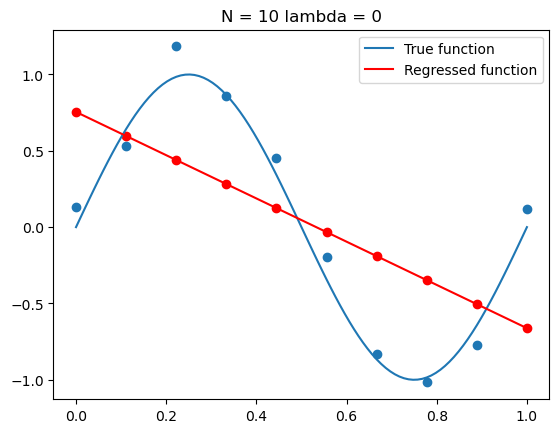

 train error =  2.964796666872929  test error =  48.15166779000105


In [4]:
fit_plot_linear(N = 10, l=0)

How can we get the parameters from a scikit learn model?

In [5]:
(x_true, y_true), (x, y) = create_data(10)
x = x[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [6]:
print(model.coef_)

[-1.56487228]


In [7]:
print(model.intercept_)

0.742506558976925


Using basis functions!

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
def fit_plot_poly(M = 3, N = 10, l=0):
    
    (x_true, y_true), (x, y) = create_data(N)
    # Add an extra axis to be compliant with sk-learn
    x = x[:, np.newaxis]
    
    # We just need this line!
    feature_extractor = PolynomialFeatures(degree = M)
    feature_extractor.fit(x)
    x_feat = feature_extractor.transform(x)
    
    # We just need these two lines!
    model = LinearRegression()
    model.fit(x_feat, y)
    
    # Get the predictions
    y_pred = model.predict(x_feat)
    
    # Get the decision function
    x_des = np.linspace(0, 1, 100)
    x_des = x_des[:, np.newaxis]
    # Note that we need to extract features each time we call this function!
    x_des_feat = feature_extractor.transform(x_des)
    y_des = model.predict(x_des_feat)

        
    plt.plot(x_true, y_true)
    plt.plot(x_des, y_des, c='r')
    plt.legend(['True function', 'Regressed function'])
    plt.scatter(x, y,)
    plt.scatter(x, y_pred, c='r')
    plt.title( 'N = ' + str(N) + " lambda = " + str(l))
    plt.show()
    
    # Create a validation set
    _,  (x_val, y_val) = create_data(211, noise=0.1)
    x_val = x_val[:, np.newaxis]
    x_val_feat = feature_extractor.transform(x_val)
    y_val_pred = model.predict(x_val_feat)

    print( " train error = ", np.sum((y - y_pred)**2), " test error = ", np.sum((y_val - y_val_pred)**2))
    
    print("W = ", model.coef_)
    print(model.intercept_)

Note that according to scikit-learn:

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

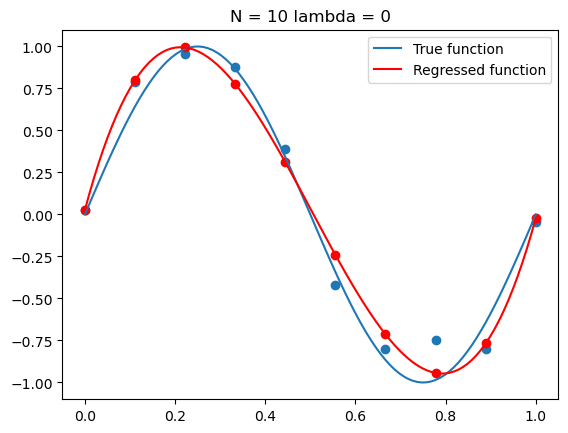

 train error =  0.09686831676174099  test error =  4.371784100703808
W =  [  0.          10.02976077 -29.97125447  19.89298051]
0.026739791389388305


In [10]:
fit_plot_poly(M = 3, N = 10, l=0)

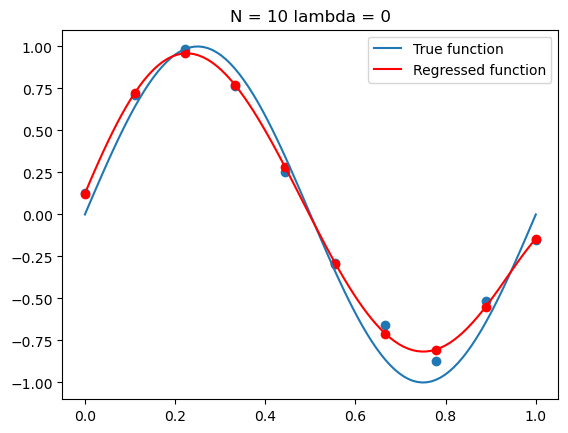

 train error =  0.010420697173044757  test error =  4.235666936757159
W =  [  0.           6.34771393  -3.3201981  -56.21708293  92.59498656
 -39.67457198]
0.12475953235757649


In [11]:
fit_plot_poly(M = 5, N = 10, l=0)

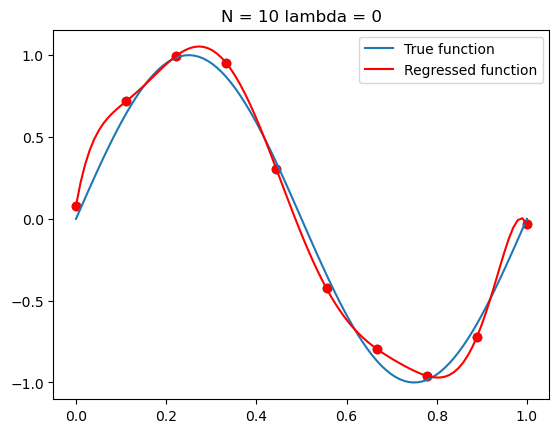

 train error =  1.0539844069690324e-24  test error =  3.448651914318961
W =  [-2.63516963e-07  1.55482452e+01 -1.76786974e+02  1.13111275e+03
 -3.52946855e+03  4.78094578e+03 -1.13153151e+03 -2.96267649e+03
  1.04746910e+03  2.08974098e+03 -1.40084101e+03  1.36372057e+02]
0.08133912981111711


In [12]:
fit_plot_poly(M = 11, N = 10, l=0)

Using ridge regression is extremely simple!


In [13]:
from sklearn.linear_model import Ridge
def fit_plot_poly_ridge(M = 3, N = 10, l=0):
    
    (x_true, y_true), (x, y) = create_data(N)
    # Add an extra axis to be compliant with sk-learn
    x = x[:, np.newaxis]
    
    # We just need this line!
    feature_extractor = PolynomialFeatures(degree = M)
    feature_extractor.fit(x)
    x_feat = feature_extractor.transform(x)
    
    # We just need these two lines!
    # Note that lambda is called alpha by sklearn
    model = Ridge(alpha=l, solver='svd')
    model.fit(x_feat, y)
    
    # Get the predictions
    y_pred = model.predict(x_feat)
    
    # Get the decision function
    x_des = np.linspace(0, 1, 100)
    x_des = x_des[:, np.newaxis]
    # Note that we need to extract features each time we call this function!
    x_des_feat = feature_extractor.transform(x_des)
    y_des = model.predict(x_des_feat)

        
    plt.plot(x_true, y_true)
    plt.plot(x_des, y_des, c='r')
    plt.legend(['True function', 'Regressed function'])
    plt.scatter(x, y,)
    plt.scatter(x, y_pred, c='r')
    plt.title( 'N = ' + str(N) + " lambda = " + str(l))
    plt.show()
    
    # Create a validation set
    _,  (x_val, y_val) = create_data(211, noise=0.1)
    x_val = x_val[:, np.newaxis]
    x_val_feat = feature_extractor.transform(x_val)
    y_val_pred = model.predict(x_val_feat)

    print( " train error = ", np.sum((y - y_pred)**2), " test error = ", np.sum((y_val - y_val_pred)**2))
    
    print("W = ", model.coef_)
    print(model.intercept_)

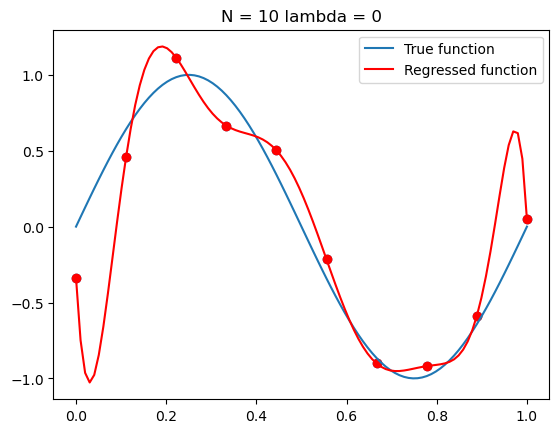

 train error =  6.174656025115913e-22  test error =  29.895828038305055
W =  [ 3.88486404e-06 -5.19341676e+01  1.20750622e+03 -8.91599226e+03
  3.09331944e+04 -5.20230436e+04  2.81511370e+04  2.91623950e+04
 -3.13797980e+04 -2.40849672e+04  4.15475167e+04 -1.45456266e+04]
-0.3386839847223453


In [14]:
fit_plot_poly_ridge(M = 11, N = 10, l=0)

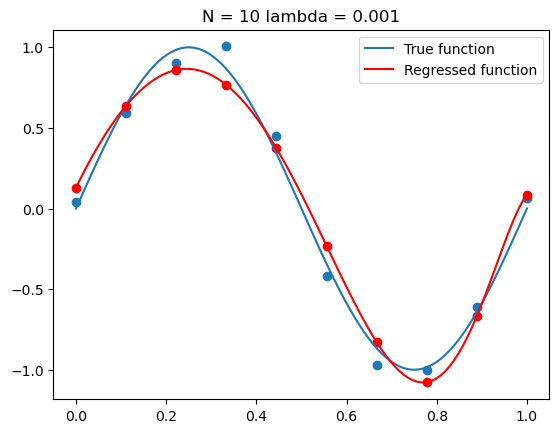

 train error =  0.13940205408057846  test error =  3.6625247121207343
W =  [ 3.91993195e-14  5.73231346e+00 -9.86176233e+00 -5.60487025e+00
  3.66463387e-01  3.85732564e+00  4.83342569e+00  4.10391153e+00
  2.41388104e+00  2.80067608e-01 -1.97955283e+00 -4.18507103e+00]
0.13025164554675686


In [15]:
fit_plot_poly_ridge(M = 11, N = 10, l=0.001)

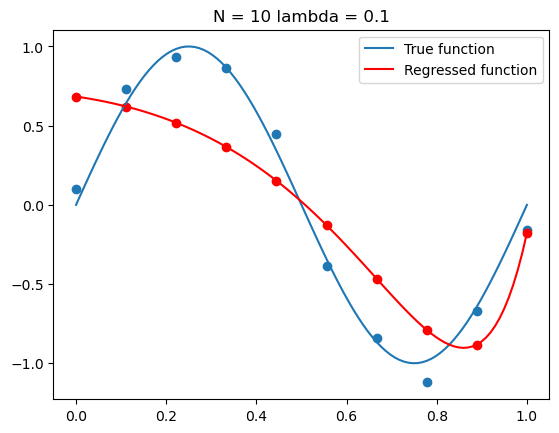

 train error =  1.2250292875624433  test error =  25.23825290921966
W =  [ 2.74467536e-15 -4.16361325e-01 -1.24344682e+00 -9.38334969e-01
 -4.93584772e-01 -1.27779663e-01  1.32642904e-01  3.05406799e-01
  4.13639528e-01  4.76661789e-01  5.08830737e-01  5.20349368e-01]
0.683807035703042


In [16]:
fit_plot_poly_ridge(M = 11, N = 10, l=0.1)

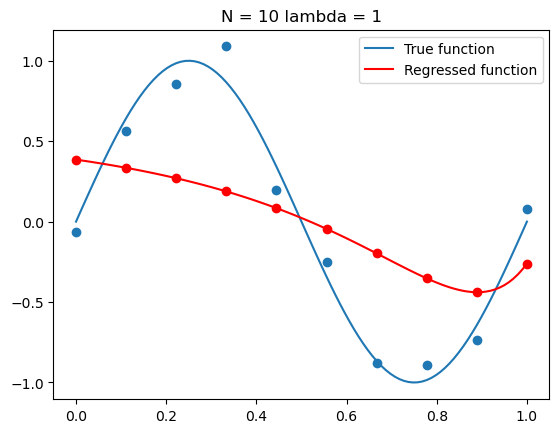

 train error =  2.424448417269146  test error =  51.5757461200007
W =  [ 2.97286279e-16 -4.06235872e-01 -4.34847570e-01 -3.11772188e-01
 -1.82488840e-01 -7.55523263e-02  7.78475286e-03  7.18683727e-02
  1.21284897e-01  1.59733689e-01  1.89983333e-01  2.14058974e-01]
0.3854344805045657


In [17]:
fit_plot_poly_ridge(M = 11, N = 10, l=1)